In [684]:
#10-2 IRIS데이터를 이용한 오토인코더 구현
import numpy as np
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv1D, Conv1DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


# Split Train, Test Dataset From All Dataset
def split_train_test(X, y): # (allData, 150, 100)
    total_length=150; train_length=120; feature_length=4;
    
    # dataset과 같은 차원의 zeros ndarray 생성
    all_idx_arr = []
    X_train = np.zeros(shape=[train_length, feature_length]) # train_data초기화
    y_train = np.zeros(shape=[train_length, 3])
    
    X_test = np.zeros(shape=[total_length - train_length, feature_length]) # test_data초기화
    y_test = np.zeros(shape=[total_length - train_length, 3])
    
    
    for i in range(0, total_length):
        all_idx_arr.append(i)
    
    
    train_idx_arr = np.random.choice(total_length, train_length, replace=False)
    test_idx_arr = list(set(all_idx_arr) - set(train_idx_arr))
    
    j=0;
    for i in train_idx_arr:
        X_train[j] = X[i]
        if y[i] == 0:
            y_train[j] = np.array([1,0,0])
        elif y[i] == 1:
            y_train[j] = np.array([0,1,0])
        elif y[i] == 2:
            y_train[j] = np.array([0,0,1])
        
        j+=1
    
    j=0
    for i in test_idx_arr:
        X_test[j] = X[i]
        if y[i] == 0:
            y_test[j] = np.array([1,0,0])
        elif y[i] == 1:
            y_test[j] = np.array([0,1,0])
        elif y[i] == 2:
            y_test[j] = np.array([0,0,1])
            
        j+=1
        
    return X_train, y_train, X_test, y_test

#IRIS 데이터 Load
from sklearn import datasets
allData = datasets.load_iris()
X = allData.data
y = allData.target

(X_train, y_train, X_test, y_test) = split_train_test(X, y)


In [685]:
#### 인코더 설계
encoder_input = Input(shape=(4,))
x = Dense(64, activation='relu')(encoder_input)
x = Dense(64, activation='relu')(x)
x = Dense(3, activation='softmax')(x)
x = Flatten()(x)
zdim = 2
encoder_output = Dense(zdim)(x)
encoder = Model(encoder_input, encoder_output);

# encoder.compile(optimizer='Adam', loss='mse', metrics=['acc'])
# history = encoder.fit(X_train, y_train, epochs=100, validation_split=0.2)

#### 디코더 설계
decoder_input = Input(shape=(zdim,))
x = Dense(3)(decoder_input)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(4, activation='relu')(x)

decoder_output = x
decoder = Model(decoder_input, decoder_output)

model_input = encoder_input
model_output = decoder(encoder_output)

#### 오토인코더 모델 생성
model = Model(model_input, model_output) 

#### 오토인코더 학습
model.compile(optimizer='Adam', loss='mse')
model.fit(X_train, X_train, epochs=30, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/30
2/2 [==============================] - 0s 96ms/step - loss: 15.7944 - val_loss: 14.8868
Epoch 2/30
2/2 [==============================] - 0s 12ms/step - loss: 15.5682 - val_loss: 14.6354
Epoch 3/30
2/2 [==============================] - 0s 11ms/step - loss: 15.3054 - val_loss: 14.3347
Epoch 4/30
2/2 [==============================] - 0s 11ms/step - loss: 14.9907 - val_loss: 13.9673
Epoch 5/30
2/2 [==============================] - 0s 10ms/step - loss: 14.6030 - val_loss: 13.5219
Epoch 6/30
2/2 [==============================] - 0s 11ms/step - loss: 14.1301 - val_loss: 12.9983
Epoch 7/30
2/2 [==============================] - 0s 11ms/step - loss: 13.5888 - val_loss: 12.4128
Epoch 8/30
2/2 [==============================] - 0s 11ms/step - loss: 12.9857 - val_loss: 11.7904
Epoch 9/30
2/2 [==============================] - 0s 10ms/step - loss: 12.3397 - val_loss: 11.1474
Epoch 10/30
2/2 [==============================] - 0s 11ms/step - loss: 11.6820 - val_loss: 10.5085
Epoch 11/

In [747]:
#### X_test를 복원하는 예측 실험
res = model.predict(X_test)
print(res)

# print(model.get_weights()[0])

[[5.5032673 3.724039  3.6318579 1.5039613]
 [5.4934273 3.7173066 3.625582  1.5012739]
 [5.480448  3.7084947 3.6172333 1.4977713]
 [5.4888163 3.714183  3.622609  1.5000339]
 [5.4865036 3.7126145 3.62112   1.4994107]
 [5.478304  3.707028  3.615865  1.497186 ]
 [5.498687  3.7209005 3.6289423 1.5027074]
 [5.503157  3.7239623 3.6317894 1.5039307]
 [5.5019736 3.7231455 3.6310422 1.5036031]
 [5.4942746 3.7178903 3.6261182 1.5015079]
 [5.4955845 3.718788  3.6269524 1.501866 ]
 [5.494065  3.717744  3.6259873 1.5014488]
 [5.491292  3.715862  3.624204  1.5007006]
 [5.502077  3.72322   3.6311042 1.5036335]
 [5.5005383 3.7221613 3.630129  1.5032097]
 [5.4994774 3.7214506 3.6294372 1.502929 ]
 [5.50161   3.722898  3.6308086 1.5035045]
 [5.500719  3.7222831 3.630246  1.5032576]
 [5.5002947 3.7219896 3.629978  1.50314  ]
 [5.501815  3.7230372 3.6309407 1.5035597]
 [5.4988594 3.721016  3.6290555 1.5027529]
 [5.499565  3.7214947 3.6295092 1.502943 ]
 [5.500247  3.7219622 3.6299417 1.5031303]
 [5.499981 

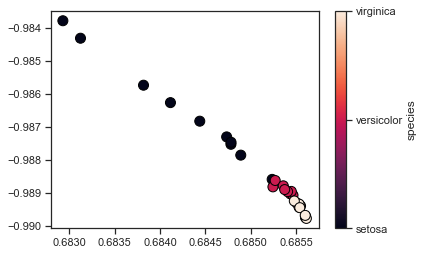

In [748]:
#### 2차원 공간에 뿌려 Manifold 확인
z = encoder.predict(X_test)

A = np.array([1.,0.,0.])
B = np.array([0.,1.,0.])
C = np.array([0.,0.,1.])

origin_y_test = []
for i in range(0,len(y_test)):
    if np.array_equal(A, y_test[i]):
        origin_y_test.append(0)
    elif np.array_equal(B, y_test[i]):
        origin_y_test.append(1)
    else:
        origin_y_test.append(2)
        

plt.scatter(z[:,0], z[:,1], s=100, alpha=1, c=origin_y_test, edgecolors='black')

cb=plt.colorbar(label='species')
cb.set_ticks([0,1,2])
cb.set_ticklabels(["setosa","versicolor","virginica"])
plt.show()

[0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2]

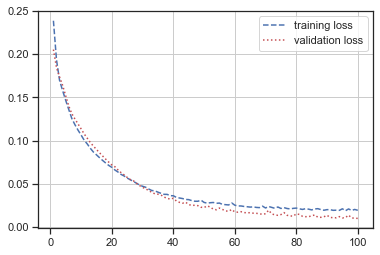

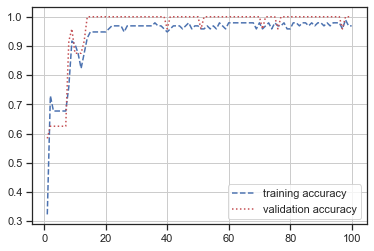

In [525]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [562]:
# y_test
res = model.evaluate(X_test, y_test)
print(res)

1/1 - 0s - loss: 0.0119 - acc: 1.0000
[0.0119012501090765, 1.0]
